# New York City train travel time

**Background:** This notebook cleans and processes subway data on **"additional train time"** from the MTA's [Subway Dashboard](http://dashboard.mta.info/). Additional train time is defined by the MTA as the *"the estimated average time customers spend onboard a train beyond their scheduled travel time."* 

This is computed against an undisclosed average of scheduled traveled time by regulators. 

**Tools:** pandas, plotnine, HTML/CSS, Illustrator, ai2html (for write-up and graphics)

## Do your imports

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read through through the CSV

The CSV was downloaded from the website and includes both peak and non-peak hours. We will be using peak hours for our analysis.

In [2]:
df= pd.read_excel('Additional Train Time.xlsx')
pd.set_option('display.max_columns',None)
df

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default


,month,division,line,period,num_passengers,additional train time
0,2015-01,A DIVISION,S 42nd,peak,1551410.2,0.20
1,2015-01,A DIVISION,6,offpeak,7674809.6,0.91
2,2015-01,A DIVISION,6,peak,7631920.2,1.48
3,2015-01,A DIVISION,1,offpeak,5442987.9,0.67
4,2015-01,A DIVISION,1,peak,5170116.8,0.83
...,...,...,...,...,...,...
3267,2022-02,A DIVISION,5,offpeak,1731783.7,0.24
3268,2022-02,B DIVISION,L,peak,1829781.4,0.08
3269,2022-02,B DIVISION,E,offpeak,2223508.9,1.19
3270,2022-02,A DIVISION,4,offpeak,2420416.5,0.35


## Cleaning the data

### Rename columns

In [3]:
df = df.rename(columns={"additional train time": "additional_train_time"})

### Drop unnecessary columns

We will not be needing the **division** and **number of passengers** information for this analysis.

In [4]:
df= df.drop('division', axis=1)
df= df.drop('num_passengers', axis=1)
df

,month,line,period,additional_train_time
0,2015-01,S 42nd,peak,0.20
1,2015-01,6,offpeak,0.91
2,2015-01,6,peak,1.48
3,2015-01,1,offpeak,0.67
4,2015-01,1,peak,0.83
...,...,...,...,...
3267,2022-02,5,offpeak,0.24
3268,2022-02,L,peak,0.08
3269,2022-02,E,offpeak,1.19
3270,2022-02,4,offpeak,0.35


### Trimming the data

We will only be getting data from 2018 until February 2022 or just the past five years. We will overwrite our dataframe with it.

In [5]:
df = df[df.month>="2018-01"]
df

,month,line,period,additional_train_time
896,2018-01,6,peak,1.53
897,2018-01,W,peak,0.60
898,2018-01,E,offpeak,2.49
899,2018-01,A,offpeak,3.05
900,2018-01,M,offpeak,0.86
...,...,...,...,...
3267,2022-02,5,offpeak,0.24
3268,2022-02,L,peak,0.08
3269,2022-02,E,offpeak,1.19
3270,2022-02,4,offpeak,0.35


### Remove the 'offpeak' data

Since the **offpeak** data is mixed in one column with the **peak** data, we first set it as index so that we can easily remove them by matching.

In [6]:
df = df.set_index("period")
df = df.drop('offpeak', axis=0)
df = df.reset_index()
df

,period,month,line,additional_train_time
0,peak,2018-01,6,1.53
1,peak,2018-01,W,0.60
2,peak,2018-01,Q,1.94
3,peak,2018-01,S 42nd,0.21
4,peak,2018-01,G,1.25
...,...,...,...,...
1183,peak,2022-02,7,0.68
1184,peak,2022-02,B,0.77
1185,peak,2022-02,M,0.52
1186,peak,2022-02,Q,0.56


### Drop the entire 'period' column

Once we have the data we need, there is no use to indicate it as **peak** additional train time data since they are all the same anyway.

In [7]:
df = df.drop('period', axis=1)
df

,month,line,additional_train_time
0,2018-01,6,1.53
1,2018-01,W,0.60
2,2018-01,Q,1.94
3,2018-01,S 42nd,0.21
4,2018-01,G,1.25
...,...,...,...
1183,2022-02,7,0.68
1184,2022-02,B,0.77
1185,2022-02,M,0.52
1186,2022-02,Q,0.56


### Create a pivot table

We need the train lines to be the columns so that we can merge it with the **average additional train time data** which we have on a separate CSV.

The goal is to create a separate column for the average data.

In [8]:
df.pivot = df.pivot_table(columns="line", index='month', \
                          values='additional_train_time', fill_value='0', dropna=False).reset_index()

In [9]:
df.pivot

line,month,1,2,3,4,5,6,7,A,B,C,D,E,F,G,JZ,L,M,N,Q,R,S 42nd,S Fkln,S Rock,W
0,2018-01,1.03,1.29,1.03,1.76,2.03,1.53,2.46,2.49,2.72,1.36,2.64,1.79,1.72,1.25,1.73,0.70,0.79,1.79,1.94,0.34,0.21,-0.09,0.41,0.6
1,2018-02,0.99,1.01,0.78,1.48,1.53,1.27,2.00,1.78,1.74,0.98,2.07,1.89,1.77,1.17,1.42,0.56,0.82,1.56,1.35,0.38,0.2,-0.07,0.07,1.22
2,2018-03,0.85,1.03,0.78,1.46,1.63,1.48,2.40,1.50,1.4,0.9,1.79,1.13,1.09,1.14,1.42,0.70,0.54,1.11,1.09,0.16,0.19,0.09,0.11,0.39
3,2018-04,0.87,0.98,0.63,1.21,1.28,1.23,2.02,1.96,1.37,1.21,1.60,1.68,1.47,1.11,1.26,0.49,0.90,0.89,1.14,0.20,0.19,0.01,0.00,0.34
4,2018-05,0.88,0.77,0.65,1.10,1.25,1.16,1.89,1.35,1.29,0.63,1.47,1.50,1.22,1.07,1.21,0.41,1.09,0.91,1.14,0.13,0.18,0.05,-0.04,0.4
5,2018-06,0.78,0.52,0.43,0.98,1.02,1.02,2.34,1.40,1.39,0.65,1.65,0.86,0.95,1.03,1.51,0.31,0.86,0.98,1.11,0.26,0.18,0.07,0.03,0.62
6,2018-07,0.89,0.79,0.63,1.14,1.14,1.02,1.74,1.41,1.2,0.75,1.75,1.41,1.24,1.06,1.53,0.45,0.96,0.85,0.81,0.46,0.19,0.03,0.21,0.36
7,2018-08,0.81,0.63,0.30,0.49,0.55,0.83,1.44,1.65,1.42,0.84,1.86,0.86,0.74,1.01,1.48,0.19,0.81,1.57,1.20,0.62,0.18,0.02,0.10,0.42
8,2018-09,1.00,0.63,0.47,1.26,1.10,1.03,0.75,1.57,1.5,0.83,1.81,1.10,1.05,1.11,1.73,0.27,0.94,1.43,1.18,0.65,0.19,-0.04,-0.05,0.34
9,2018-10,0.99,0.73,0.49,1.20,1.11,1.02,1.26,1.57,1.57,0.8,1.87,1.05,0.97,1.33,1.69,0.68,0.90,1.50,1.16,0.65,0.19,0.05,0.07,0.71


### Read the CSV file containing average data across trains

In [10]:
df_average = pd.read_csv('train-stats.csv')
df_average.head()

,Period,ave_train_time,ave_platform_time
0,18-Jan,1.33,1.34
1,18-Feb,1.18,1.21
2,18-Mar,1.08,1.22
3,18-Apr,1.06,1.15
4,18-May,1.02,1.13


### Create new column on your pivot table

This is for the **average train time** across the train system.

In [11]:
df.pivot['ave_train_time']= df_average['ave_train_time']

In [12]:
df.pivot

line,month,1,2,3,4,5,6,7,A,B,C,D,E,F,G,JZ,L,M,N,Q,R,S 42nd,S Fkln,S Rock,W,ave_train_time
0,2018-01,1.03,1.29,1.03,1.76,2.03,1.53,2.46,2.49,2.72,1.36,2.64,1.79,1.72,1.25,1.73,0.70,0.79,1.79,1.94,0.34,0.21,-0.09,0.41,0.6,1.33
1,2018-02,0.99,1.01,0.78,1.48,1.53,1.27,2.00,1.78,1.74,0.98,2.07,1.89,1.77,1.17,1.42,0.56,0.82,1.56,1.35,0.38,0.2,-0.07,0.07,1.22,1.18
2,2018-03,0.85,1.03,0.78,1.46,1.63,1.48,2.40,1.50,1.4,0.9,1.79,1.13,1.09,1.14,1.42,0.70,0.54,1.11,1.09,0.16,0.19,0.09,0.11,0.39,1.08
3,2018-04,0.87,0.98,0.63,1.21,1.28,1.23,2.02,1.96,1.37,1.21,1.60,1.68,1.47,1.11,1.26,0.49,0.90,0.89,1.14,0.20,0.19,0.01,0.00,0.34,1.06
4,2018-05,0.88,0.77,0.65,1.10,1.25,1.16,1.89,1.35,1.29,0.63,1.47,1.50,1.22,1.07,1.21,0.41,1.09,0.91,1.14,0.13,0.18,0.05,-0.04,0.4,1.02
5,2018-06,0.78,0.52,0.43,0.98,1.02,1.02,2.34,1.40,1.39,0.65,1.65,0.86,0.95,1.03,1.51,0.31,0.86,0.98,1.11,0.26,0.18,0.07,0.03,0.62,1.00
6,2018-07,0.89,0.79,0.63,1.14,1.14,1.02,1.74,1.41,1.2,0.75,1.75,1.41,1.24,1.06,1.53,0.45,0.96,0.85,0.81,0.46,0.19,0.03,0.21,0.36,1.03
7,2018-08,0.81,0.63,0.30,0.49,0.55,0.83,1.44,1.65,1.42,0.84,1.86,0.86,0.74,1.01,1.48,0.19,0.81,1.57,1.20,0.62,0.18,0.02,0.10,0.42,0.59
8,2018-09,1.00,0.63,0.47,1.26,1.10,1.03,0.75,1.57,1.5,0.83,1.81,1.10,1.05,1.11,1.73,0.27,0.94,1.43,1.18,0.65,0.19,-0.04,-0.05,0.34,1.01
9,2018-10,0.99,0.73,0.49,1.20,1.11,1.02,1.26,1.57,1.57,0.8,1.87,1.05,0.97,1.33,1.69,0.68,0.90,1.50,1.16,0.65,0.19,0.05,0.07,0.71,1.01


## Plot the data

Warning: This is messy!

<AxesSubplot:xlabel='month'>

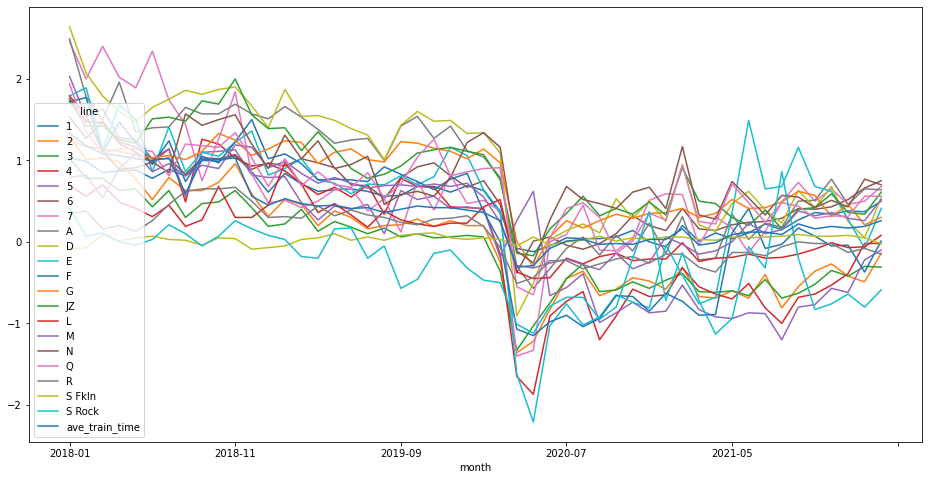

In [13]:
df.pivot.plot(x='month', figsize=(16,8))

## Save file to CSV

In [14]:
#df.pivot.to_csv('train-time.csv')

# End